In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from tqdm import tqdm
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from skimage import io

In [2]:
from cassava.transforms import get_train_transforms, get_test_transforms
from cassava.utils import *

In [3]:
%matplotlib inline

In [4]:
train_images_torch = context.catalog.load('train_images_lmdb')

2020-12-10 20:47:48,120 - kedro.io.data_catalog - INFO - Loading data from `train_images_lmdb` (KedroImageLMDBDataSet)...


In [5]:
raw_transforms = A.Compose([
        A.ToFloat(max_value=1.0),
        A.Resize(256, 256),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
])

In [6]:
def get_train_transforms():
    return A.Compose([
        A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=5, val_shift_limit=5, p=1),
        A.ToFloat(max_value=1.0),
        A.RandomResizedCrop(256, 256, scale=(0.3, 0.9)),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

In [42]:
def get_test_transforms():
    return A.Compose([
        A.ToFloat(max_value=1.0),
        A.Resize(400, 400),
        A.CenterCrop(256, 256),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

In [35]:
aug_transforms = get_train_transforms()
aug_transforms

Compose([
  HueSaturationValue(always_apply=False, p=1, hue_shift_limit=(-5, 5), sat_shift_limit=(-5, 5), val_shift_limit=(-5, 5)),
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  RandomResizedCrop(always_apply=False, p=1.0, height=256, width=256, scale=(0.3, 0.9), ratio=(0.75, 1.3333333333333333), interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [36]:
test_transforms = get_test_transforms()
test_transforms

Compose([
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  CenterCrop(always_apply=False, p=1.0, height=256, width=256),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [43]:
raw_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=raw_transforms)
augmented_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=aug_transforms)
test_aug_dataset = DatasetFromSubset(torch.utils.data.Subset(train_images_torch, indices=list(range(len(train_images_torch)))), transform=test_transforms)

In [38]:
unnorm = Unnormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [39]:
idx = np.random.choice(range(len(train_images_torch)))

3


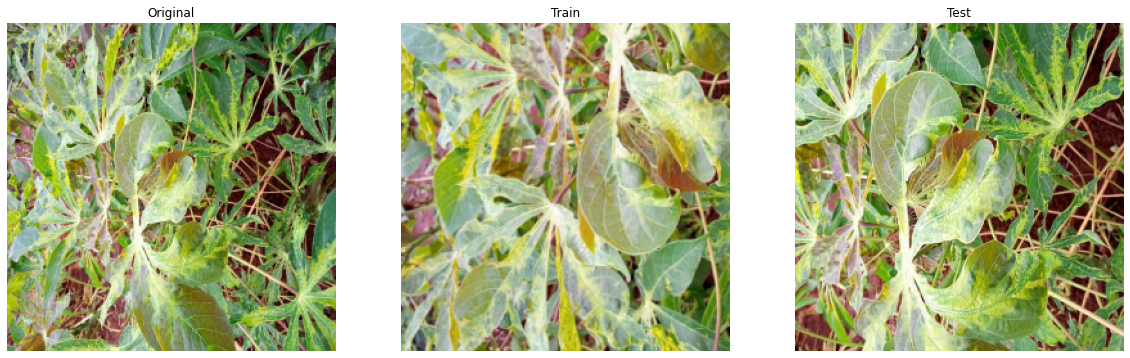

In [51]:
raw_image, label = raw_dataset[idx]
aug_image, _ = augmented_dataset[idx]
test_aug_image, _ = test_aug_dataset[idx]

print(label)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plot_image(unnorm(raw_image))
plt.title('Original')
plt.subplot(1, 3, 2)
plot_image(unnorm(aug_image))
plt.title('Train')
plt.subplot(1, 3, 3)
plot_image(unnorm(test_aug_image))
plt.title('Test')
plt.show()